In [ ]:
Here i am doing text analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
files=os.listdir(r'C:\Users\Sabin Sapkota\Desktop\udemy\you tube')
files[0]

'GBcomments.csv'

In [3]:
path=r'C:\Users\Sabin Sapkota\Desktop\udemy\you tube'
df=pd.read_csv(path+'/'+files[0],error_bad_lines=False)
df.head(2)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   

   replies  
0        0  
1        0

In [4]:
df.shape

(718452, 4)

In [5]:
from textblob import TextBlob
TextBlob("It's more accurate to call it the M+ (1000) because the price is closer than calling it the X (10).").sentiment.polarity

0.45000000000000007

In [6]:
df.comment_text[0]

"It's more accurate to call it the M+ (1000) because the price is closer than calling it the X (10)."

In [10]:
#ckecking polarity of the sentence
TextBlob(df.comment_text[0]).sentiment.polarity

0.45000000000000007

In [11]:
#check for na value
df.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [12]:
df=df.dropna()

In [13]:
#polarity of text
df['polarity']=df.comment_text.apply(lambda x:TextBlob(x).sentiment.polarity)
#df['polarity']=df.comment_text.apply(polarity)

In [14]:
df.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [15]:
mask=(df.polarity==1)
df1=df.loc[mask,:]
df1.shape

(20400, 5)

In [16]:
df1.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [17]:
from wordcloud import WordCloud,STOPWORDS

In [18]:
stopwords=set(STOPWORDS)

In [19]:
#function that genearate word clouds
def fxn(df,polarity):
    mask=(df.polarity==polarity)
    df1=df.loc[mask,:]
    total_text=' '.join(df1.comment_text)
    x=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
    plt.figure(figsize=(10,7))
    plt.imshow(x)
    plt.axis('off')
    plt.title('words cloud ',fontsize=15,fontweight='bold');
   

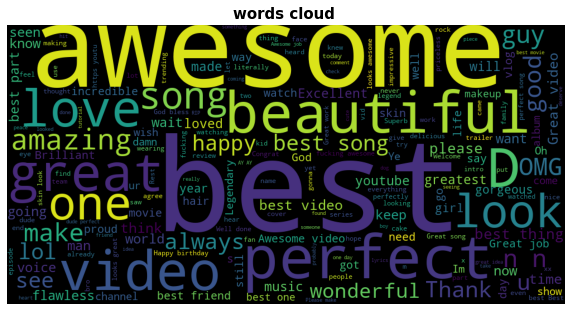

In [20]:
# function for  positive wordcloud
fxn(df,1)

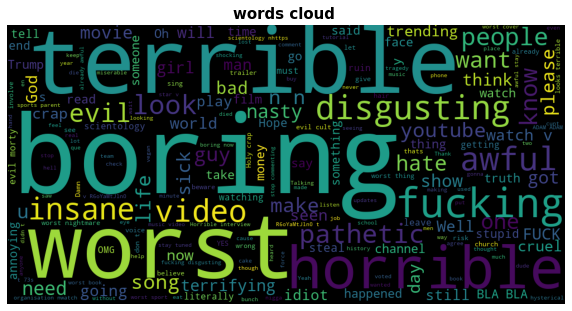

In [21]:
# function for negative word cloud
fxn(df,-1)

In [22]:
files=os.listdir(r'C:\Users\Sabin Sapkota\Desktop\udemy\you tube')
files[1]
path=r'C:\Users\Sabin Sapkota\Desktop\udemy\you tube'
df=pd.read_csv(path+'/'+files[1],error_bad_lines=False)
df.head(2)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


video_id                                              title  \
0  jt2OHQh0HoQ  Live Apple Event - Apple September Event 2017 ...   
1  AqokkXoa7uE  Holly and Phillip Meet Samantha the Sex Robot ...   

  channel_title  category_id  \
0   Apple Event           28   
1  This Morning           24   

                                                tags    views  likes  \
0  apple events|apple event|iphone 8|iphone x|iph...  7426393  78240   
1  this morning|interview|holly willoughby|philli...   494203   2651   

   dislikes  comment_total                                     thumbnail_link  \
0     13548            705  https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...   
1      1309              0     https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg   

    date  
0  13.09  
1  13.09

In [23]:
tags=' '.join(df.tags)
tags

"apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11 this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat shows - topic|chat show - topic|talk shows - topic|sex robot|samantha|real life emmablackery|emma blackery|emma|blackery|british vlogger|british youtuber|female vlogger|birdyboots|dna test|23andme|ancestry skit|korean|language|conversation|esl|japanese|foreign|communication|don't speak|struggle|foreigner|lotte mart|korea|south|weather|good|tutorial sprinkleofglitter|sprinkle of glitter|baby glitter|Louise Pentland|Louise Pentland Baby Name|Mrs Meldrum|Baby Names|Nice baby names|Unusual baby names Rio Ferdinand|Rio|Ferdinand|5 Magazine|5 Mag|#5|5 Rio Ferdinand|Rio Ferdinand interview|football|soccer|interview|Manchester United|Man United|fifa 18|fut 18|fut|fifa ratings|fifa 18 ratings|chelsea|chelsea fc|chelsea f.c|David Luiz|Eden Hazard|Christensen|Premier League|Champions League|Fifa18|Hazard Fifa 18|David

In [24]:
import re
#repalcing all  by space expect charatcter
tags=re.sub(r'[^a-zA-Z]',' ',tags)

tags

'apple events apple event iphone   iphone x iphone   plus iphone  s iphone  s plus ios    this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows   topic chat show   topic talk shows   topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test   andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand   Magazine   Mag      Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa    fut    fut fifa ratings fifa    ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa   Hazard Fifa    David

In [54]:
#repalceing duoble space by single space
tags=re.sub(' +',' ',tags)
tags

'apple events apple event iphone iphone x iphone plus iphone s iphone s plus ios this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows topic chat show topic talk shows topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand Magazine Mag Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa fut fut fifa ratings fifa ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa Hazard Fifa David Luiz Fifa Christensen Fifa Chelsea Fifa

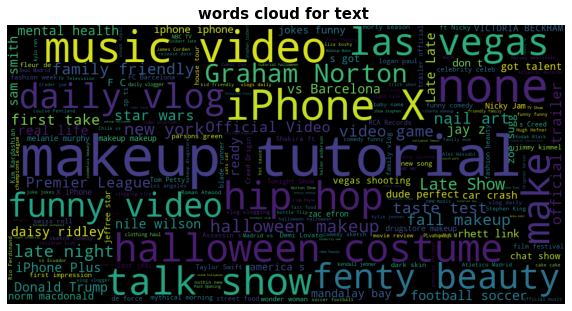

In [25]:
text=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(10,7))
plt.imshow(text)
plt.axis('off')
plt.title('words cloud for text ',fontsize=15,fontweight='bold');

 the correlation coeffecinet between views and likes is 0.87


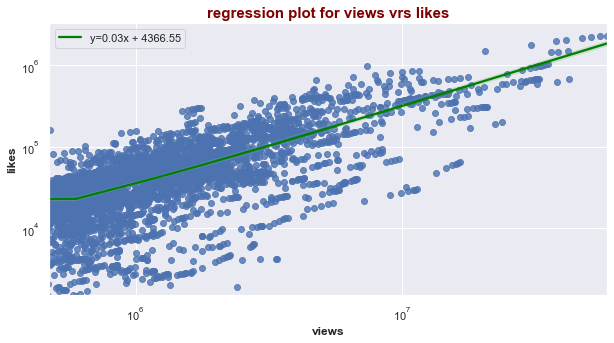

In [104]:
print(f' the correlation coeffecinet between views and likes is {round(df.views.corr(df.likes),2)}')
from scipy import stats
sns.set(rc={"figure.figsize":(10, 5)})
slope, intercept, r_value, p_value, std_err = stats.linregress(df['views'],df['likes'])

ax=sns.regplot(data=df,x='views',y='likes',line_kws={'label':f'y={round(slope,2)}x + {round(intercept,2)}','color':'green'})
plt.xscale("log")
plt.yscale("log")
plt.title('regression plot for views vrs likes',fontsize=15,fontweight='bold',color='maroon')
plt.xlabel('views',fontweight='bold',fontsize=12)
plt.ylabel('likes',fontweight='bold',fontsize=12)
ax.legend();

 the correlation coeffecinet between views and dislikes is 0.67


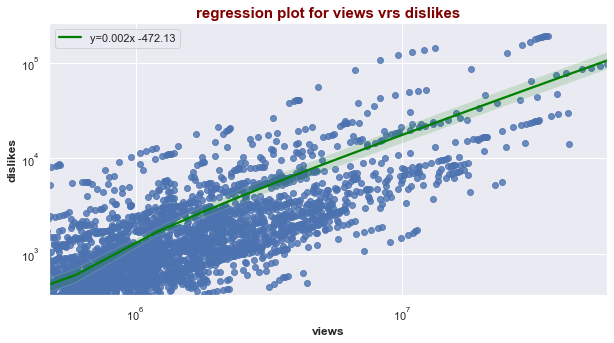

In [118]:
print(f' the correlation coeffecinet between views and dislikes is {round(df.views.corr(df.dislikes),2)}')
from scipy import stats
sns.set(rc={"figure.figsize":(10, 5)})
slope, intercept, r_value, p_value, std_err = stats.linregress(df['views'],df['dislikes'])

ax=sns.regplot(data=df,x='views',y='dislikes',line_kws={'label':f'y={round(slope,3)}x {round(intercept,2)}','color':'green'},ci=None)
plt.xscale("log")
plt.yscale("log")
plt.title('regression plot for views vrs dislikes',fontsize=15,fontweight='bold',color='maroon')
plt.xlabel('views',fontweight='bold',fontsize=12)
plt.ylabel('dislikes',fontweight='bold',fontsize=12)
ax.legend();

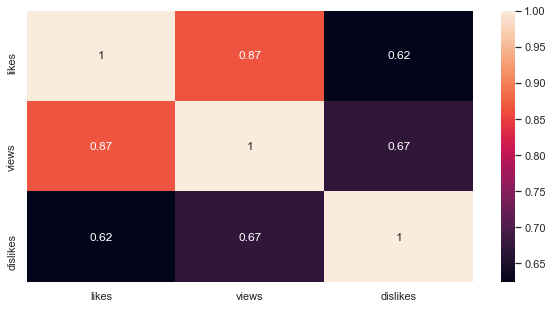

In [116]:
#checking correlation between features
df_cor=df[['likes','views','dislikes']]

sns.heatmap(df_cor.corr(),annot=True);

In [ ]:
we can see  high correlation between views and likes